In [1]:
from sympy import *
import numpy as np
import math

import matplotlib.pyplot as plt

# The Rayleigh equation and the Shear Layer instability

Some of the reasoning is based on Criminale, Jackson, Joslin THEORY AND COMPUTATION OF HYDRODYNAMIC STABILITY, 2003

We will attempt to solve the stability problem of an inviscid shear layer using the Rayleigh equations

The Orr-Sommerfeld equation (4'th order for v) results from the Navier-Stokes written for the perturbation $v$ around solution $U$ and an additional assumption that perturbation has a form of a normal mode (is periodic and written as a monochromatic traveling wave). This problem is stated as follows:
$$
(U-c)(\frac{\partial^2 v}{\partial y^2}-\alpha^2 v) - \frac{\partial^2 U}{\partial y} v =
(i \alpha Re)^{-1}(\frac{\partial^4 v}{\partial y^4}-2\alpha^2 \frac{\partial^2 v}{\partial y^2} + \alpha^4 v)
$$
has a problem in the fact that it is the forth order and not so much fun to solve. But in the limit of $Re\to\infty$ it gets to be much nicer, and is called the Rayleigh equation:
$$
(U-c)(\frac{\partial^2 v}{\partial y^2}-\alpha^2 v) - \frac{\partial^2 U}{\partial y} v = 0
$$
In the above $c$ is a complex wave velocity while $\omega=\alpha c$ the complex wave length, and $\alpha$ plays a role of a real wavenumber defining the spatial extension of the perturbation. We note that the Rayleigh equation is in fact an PDE eigen problem, with $c$ the eigen value and $v$ the eigen function. While the notion of eigen function might be strange to you (is it?) you should be familiar with eigen values and vectors of a square matrix. So an eigen problem for a PDE is just a generalization.

Let us start with piecewise linear profile (this way we will be able to obtain necessary constants). That is let the velocity $U$ be as follows:

$$
U(y) = \cases{-1 for y < -1 \\
              y for y \in (-1,1) \\
              1 for y > 1}
$$
It is good to start with a plot:

In [2]:
y = Symbol('y')
U = Piecewise(
    (-1, y < -1),
    (1, y > 1),
    ( y, True )
)
dU = U.diff(y)

In [3]:
dU

Piecewise((0, (y > 1) | (y < -1)), (1, True))

In [4]:
fdU= lambdify(y, dU, 'numpy')
fU = lambdify(y, U, 'numpy')

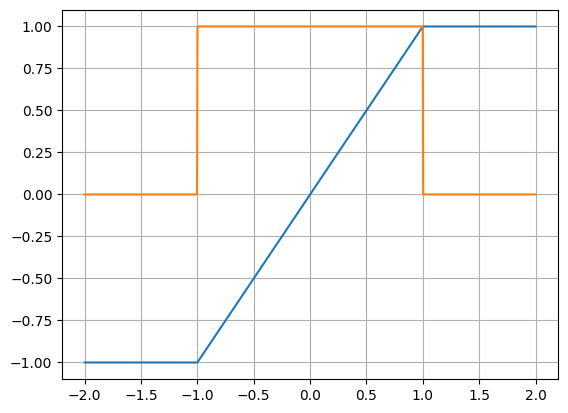

In [5]:
Y = np.linspace(-2,2,1000)
plt.plot(Y,fU(Y))
plt.plot(Y,fdU(Y))
plt.grid()

The good about the velocity profile is that $\frac{\partial^2U}{\partial y^2}=0$, so Raileigh's equation simplifies to $\frac{\partial^2 v}{\partial y^2} - \alpha^2 v = 0$ and since the solution must $v\to0$ as $y\to\pm\infty$ it might be represented as:
$$
v(y) = \cases{A exp(-\alpha(y-1)) for y > 1 \\
              B exp(-\alpha(y-1)) + C exp(\alpha(y+1)) for y \in (-1,1) \\
              D exp(\alpha(y+1)) for y < -1}
$$

In [63]:
a = Symbol('a')
A = Symbol('A')
B = Symbol('B')
C = Symbol('C')
D = Symbol('D')
o = Symbol('o')

v = Piecewise(
    (A * exp(-a*(y-1)), y > 1),
    (D * exp(a*(y+1)), y < -1),
    (B * exp(-a*(y-1)) + C * exp(a*(y+1)), True )
)

In [7]:
v

Piecewise((A*exp(-a*(y - 1)), y > 1), (D*exp(a*(y + 1)), y < -1), (B*exp(-a*(y - 1)) + C*exp(a*(y + 1)), True))

In [8]:
dv = v.diff(y)

In [9]:
dv

Piecewise((-A*a*exp(-a*(y - 1)), y > 1), (D*a*exp(a*(y + 1)), y < -1), (-B*a*exp(-a*(y - 1)) + C*a*exp(a*(y + 1)), True))

and our problem is just in finding constants $A,B,C$ and $D$, so we need to form 4 equations in order to do that. At $y\pm1$ we will impose continuity conditions ($[]$ - jump condition at both sides), that is:
1) $$ [(\alpha U - \omega)\frac{\partial v}{\partial y}-\alpha \frac{\partial U}{\partial y}v]_{y_i} = 0$$
2) $$ [\frac{v}{(\alpha U - \omega)}]_{y_i} = 0$$

This will yield 4 equations to our problem. In fact this will yield an algebraic problem, that in order to give anything but a trivial ($v=0$) solution needs to zero the matrix determinant.

### Starting with $y=-1$:

In [12]:
U1 = limit(U, y, -1, '-')
U2 = limit(U, y, -1, '+')
# dU1 = limit(dU, y, -1, '-')
# dU2 = limit(dU, y, -1, '+')
dU1 = 0
dU2 = 1
print(U1)
print(U2)
print(dU1)
print(dU2)

-1
-1
0
1


In [13]:
v1 = limit(v, y, -1, '-')
# v2 = limit(v, y, -1, '+')
v2 = B*exp(2*a)+C
dv1= limit(dv, y, -1, '-')
# dv2= limit(dv, y, -1, '+')
dv2 = -B * a * exp(2*a) + C * a
print(v1)
print(v2)
print(dv1)
print(dv2)

D
B*exp(2*a) + C
D*a
-B*a*exp(2*a) + C*a


And the equations are:

In [14]:
eq1 = Eq(((a * U1 - o) * dv1 - a * dU1 * v1) - ((a * U2 - o) * dv2 - a * dU2 * v2), 0)
eq2 = Eq((v1 / (a*U1-o)) - (v2 / (a*U2-o)),0)

### $y=1$

In [15]:
U1 = limit(U, y, 1, '-')
U2 = limit(U, y, 1, '+')
# dU1 = limit(dU, y, -1, '-')
# dU2 = limit(dU, y, -1, '+')
dU1 = 1
dU2 = 0
print(U1)
print(U2)
print(dU1)
print(dU2)

1
1
1
0


In [16]:
# v1 = limit(v, y, 1, '-')
v1 = B + C * exp(2*a)
v2 = limit(v, y, 1, '+')
# dv1= limit(dv, y, 1, '-')
dv1 = -B*a + C * a * exp(2*a)
dv2= limit(dv, y, 1, '+')
print(v1)
print(v2)
print(dv1)
print(dv2)

B + C*exp(2*a)
A
-B*a + C*a*exp(2*a)
-A*a


In [17]:
eq3 = Eq(((a * U1 - o) * dv1 - a * dU1 * v1) - ((a * U2 - o) * dv2 - a * dU2 * v2),0)
eq4 = Eq((v1 / (a*U1-o)) - (v2 / (a*U2-o)),0)

In [18]:
print(eq1)
print(eq2)
print(eq3)
print(eq4)

Eq(D*a*(-a - o) + a*(B*exp(2*a) + C) - (-a - o)*(-B*a*exp(2*a) + C*a), 0)
Eq(D/(-a - o) - (B*exp(2*a) + C)/(-a - o), 0)
Eq(A*a*(a - o) - a*(B + C*exp(2*a)) + (a - o)*(-B*a + C*a*exp(2*a)), 0)
Eq(-A/(a - o) + (B + C*exp(2*a))/(a - o), 0)


In [19]:
M, b = linear_eq_to_matrix((eq1, eq2, eq3, eq4), A, B, C, D)

In [20]:
M

Matrix([
[         0, a*(-a - o)*exp(2*a) + a*exp(2*a),                 -a*(-a - o) + a, a*(-a - o)],
[         0,               -exp(2*a)/(-a - o),                     -1/(-a - o), 1/(-a - o)],
[ a*(a - o),                   -a*(a - o) - a, a*(a - o)*exp(2*a) - a*exp(2*a),          0],
[-1/(a - o),                        1/(a - o),                exp(2*a)/(a - o),          0]])

In [21]:
det = simplify(M.det())

In [50]:
det = det * (a**2-o**2)

In [64]:
eq = Eq(det, 0)
eq

Eq(a**2*(-4*a**2*exp(4*a) + 4*a*exp(4*a) + 4*o**2*exp(4*a) - exp(4*a) + 1), 0)

In [65]:
eq.subs({a:0.1})

Eq(0.0596729879056508*o**2 + 0.000452321935095871, 0)

In [106]:
r = solve(det.subs({a:0.1}))
r[0]

-0.0870632615338401*I

In [116]:
aa = np.linspace(0.01, 1, 100)
o_i = np.zeros_like(aa)
o_r = np.zeros_like(aa)

In [120]:
for i, aaa in enumerate(aa):
    r = solve(det.subs({a:aaa}))
    o_i[i] = im(r[1])
    o_r[i] = re(r[1])
#     print(i, aaa, r, end='\n')

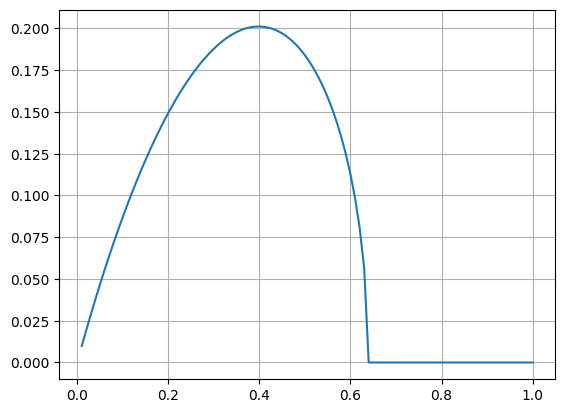

In [122]:
plt.plot(aa, o_i)
plt.grid()

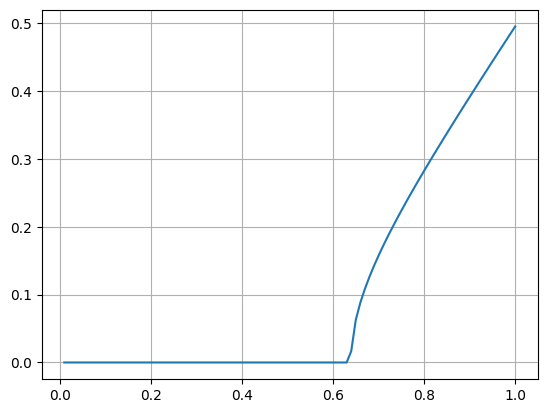

In [121]:
plt.plot(aa, o_r)
plt.grid()